# Nama : Ramdani Tarjianto
# Email : ramdani.tarjianto83@gmail.com

# Content Based Filtering

## Mendowload Dataset dari Kaggle

In [ ]:
# !pip install kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nanadanizulkuta","key":"ce8f75ddc55cd1fad372a8e7b7d24584"}'}

In [2]:
! mkdir ~/.kaggle

In [3]:
# Menyalin kaggle.json ke dalam folder yang sudah dibuat 
! cp kaggle.json ~/.kaggle/

In [4]:
# Memberikan izin untuk json bertindak 
!chmod 600 ~/.kaggle/kaggle.json

In [5]:

!kaggle datasets download -d kanametov/movies-recomendation-system

100% 155M/155M [00:01<00:00, 99.5MB/s]



In [6]:
# Mengekstrak berkas zip ke direktori aktif 
!unzip /content/movies-recomendation-system.zip

Archive:  /content/movies-recomendation-system.zip
  inflating: README.txt              
  inflating: links.csv               
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: tags.csv                


## Univariate Exploratory Data Analysis

In [7]:
# Variabel-variabel pada dataset movies-recomendation-system adalah sebagai berikut:
#   - movies = berisi tentang nama movie dan Geners
#   - ratings = berisi tentang user yang memberikan rating mulai dari 1.0 sampai 5.0 setiap movies
#   - tags = berisi tag dari setiap movies
#   - links = berisi imdbid dan tmbdid pada setiap movies

In [8]:
import pandas as pd
# untuk membaca file csv
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

In [9]:
# Pertama, mari kita eksplorasi variabel movies, yaitu berisi tentang nama movie dan genres.
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34208 entries, 0 to 34207
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  34208 non-null  int64 
 1   title    34208 non-null  object
 2   genres   34208 non-null  object
dtypes: int64(1), object(2)
memory usage: 801.9+ KB


In [10]:
print('Banyak data movies: ', len(movies.movieId.unique()))
print('jenis genres: ', movies.genres.unique())

Banyak data movies:  34208
jenis genres:  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' ...
 'Action|Comedy|Romance|Sci-Fi|Thriller' 'Action|Animation|Romance'
 'Action|Adventure|Thriller|Western']


In [11]:
# Kemudian, mari kita eksplorasi variabel ratings, yaitu berisi tentang user yang memberikan rating mulai dari 1.0 sampai 5.0 setiap movies
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22884377 entries, 0 to 22884376
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 698.4 MB


In [12]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


In [13]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.288438e+07,2.288438e+07,2.288438e+07,2.288438e+07
mean,1.235452e+05,1.140816e+04,3.526077e+00,1.128959e+09
std,7.147469e+04,2.413688e+04,1.061173e+00,1.819892e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,6.133900e+04,9.200000e+02,3.000000e+00,9.747639e+08
50%,1.233220e+05,2.329000e+03,3.500000e+00,1.115685e+09
75%,1.855250e+05,5.218000e+03,4.000000e+00,1.271194e+09
max,2.477530e+05,1.517110e+05,5.000000e+00,1.454054e+09


In [14]:
# Digunkan untuk merubah format pada columns reting menjadi int
ratings['rating'] = ratings['rating'].fillna(0.0).astype(int)

In [15]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,169,2,1204927694
1,1,2471,3,1204927438
2,1,48516,5,1204927435
3,2,2571,3,1436165433
4,2,109487,4,1436165496


In [16]:
print('Jumlah userID: ', len(ratings.userId.unique()))
print('Jumlah moviesID: ', len(ratings.movieId.unique()))
print('Jumlah data rating: ', len(ratings))

Jumlah userID:  247753
Jumlah moviesID:  33670
Jumlah data rating:  22884377


## Data Visualisai

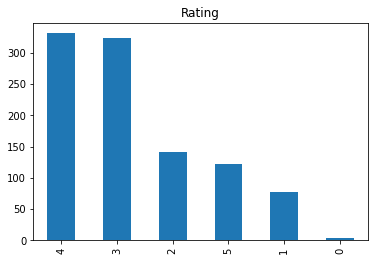

In [17]:
import matplotlib.pyplot as plt
dfff = ratings
dfff = dfff.iloc[:1000]
count = dfff["rating"].value_counts()
count.plot(kind='bar', title="Rating");

plt.show()

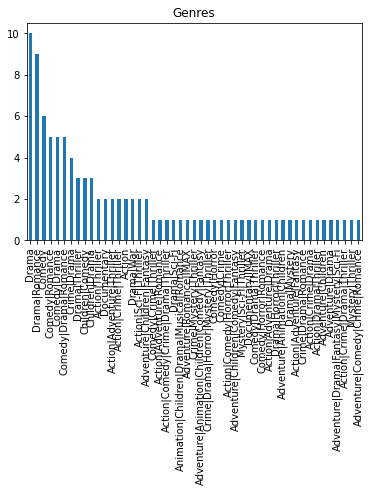

In [18]:
dff = movies
dff = dff.iloc[:100]
count = dff["genres"].value_counts()
count.plot(kind='bar', title="Genres");
plt.show()

## Data Preprocesing

In [19]:
# Menggabungkan Data dan mendefinisikan dataframe rating ke dalam variabel all_movies_rate
all_movies_rate = ratings
all_movies_rate

,userId,movieId,rating,timestamp
0,1,169,2,1204927694
1,1,2471,3,1204927438
2,1,48516,5,1204927435
3,2,2571,3,1436165433
4,2,109487,4,1436165496
...,...,...,...,...
22884372,247753,49530,5,1430437962
22884373,247753,69481,3,1430437984
22884374,247753,74458,4,1430437968
22884375,247753,76093,5,1430437811


In [20]:
 # Menghapus column timestamp pada dataframe ratings
 all_movies_rate = all_movies_rate.drop('timestamp', 1)

In [21]:
# Menggabungkan all movies_rate dengan dataframe ratings berdasarkan MovieID
all_movies_name = pd.merge(all_movies_rate, movies[['movieId','title', 'genres']], on='movieId', how='left')
 
# Print dataframe all_movies_name
all_movies_name

,userId,movieId,rating,title,genres
0,1,169,2,Free Willy 2: The Adventure Home (1995),Adventure|Children|Drama
1,1,2471,3,Crocodile Dundee II (1988),Action|Adventure|Comedy
2,1,48516,5,"Departed, The (2006)",Crime|Drama|Thriller
3,2,2571,3,"Matrix, The (1999)",Action|Sci-Fi|Thriller
4,2,109487,4,Interstellar (2014),Sci-Fi|IMAX
...,...,...,...,...,...
22884372,247753,49530,5,Blood Diamond (2006),Action|Adventure|Crime|Drama|Thriller|War
22884373,247753,69481,3,"Hurt Locker, The (2008)",Action|Drama|Thriller|War
22884374,247753,74458,4,Shutter Island (2010),Drama|Mystery|Thriller
22884375,247753,76093,5,How to Train Your Dragon (2010),Adventure|Animation|Children|Fantasy|IMAX


## Data Preparation

In [22]:
# Mengecek missing value pada dataframe all_movies
all_movies_name.isnull().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

In [23]:
# Mengurutkan movies berdasarkan moveId kemudian memasukkannya ke dalam variabel fix_movies
fix_movies = all_movies_name.sort_values('movieId', ascending=True)
fix_movies

,userId,movieId,rating,title,genres
12333067,133345,1,4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
21205144,229104,1,4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3345420,36341,1,2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
21968390,237574,1,4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
14947700,161425,1,3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
2835384,30758,151697,3,Grand Slam (1967),Thriller
15942147,172056,151701,4,Bloodmoney (2010),(no genres listed)
15942148,172056,151703,5,The Butterfly Circus (2009),Drama
15942149,172056,151709,3,Zero (2015),Drama|Sci-Fi


In [24]:
# Mengecek genre movies yang unik
fix_movies.genres.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance', ...,
       'Action|Comedy|Romance|Sci-Fi|Thriller',
       'Action|Animation|Romance', 'Action|Adventure|Thriller|Western'],
      dtype=object)

In [25]:
# Melihat genres yang (no genres listed) atau tidak ada genres
fix_movies[fix_movies['genres'] == '(no genres listed)']

,userId,movieId,rating,title,genres
717376,7755,83773,3,Away with Words (San tiao ren) (1999),(no genres listed)
4442327,47898,83829,3,Scorpio Rising (1964),(no genres listed)
2760843,29982,83829,4,Scorpio Rising (1964),(no genres listed)
12574260,135877,83829,3,Scorpio Rising (1964),(no genres listed)
5304209,56842,83829,4,Scorpio Rising (1964),(no genres listed)
...,...,...,...,...,...
12810616,138536,151669,3,Genetic Me (2014),(no genres listed)
12253335,132513,151677,3,Last Hippie Standing (2002),(no genres listed)
19597840,211660,151685,3,Alone Yet Not Alone (2013),(no genres listed)
15942147,172056,151701,4,Bloodmoney (2010),(no genres listed)


In [26]:
# selanjutnya, adalah melihat genres movies lain untuk setiap movies yang tidak ada genres
fix_movies[fix_movies['title'] == 'Scorpio Rising (1964)']

,userId,movieId,rating,title,genres
4442327,47898,83829,3,Scorpio Rising (1964),(no genres listed)
2760843,29982,83829,4,Scorpio Rising (1964),(no genres listed)
12574260,135877,83829,3,Scorpio Rising (1964),(no genres listed)
5304209,56842,83829,4,Scorpio Rising (1964),(no genres listed)
20933861,226232,83829,5,Scorpio Rising (1964),(no genres listed)
14195263,153490,83829,0,Scorpio Rising (1964),(no genres listed)
17535740,189613,83829,4,Scorpio Rising (1964),(no genres listed)
9406958,101482,83829,5,Scorpio Rising (1964),(no genres listed)
16462741,177796,83829,4,Scorpio Rising (1964),(no genres listed)
19641308,212119,83829,2,Scorpio Rising (1964),(no genres listed)


In [27]:
# Menghapus movie yang tidak bergenre agar tidak mempengaruhi hasil prediksi
fix_movies = fix_movies[fix_movies.genres != "(no genres listed)"]
# mengahpus semua row dengan label "no genres listed"

In [28]:
# Untuk memastikan bahwa sudah terhapus
fix_movies[fix_movies['genres'] == '(no genres listed)']

,userId,movieId,rating,title,genres


In [29]:
fix_movies

,userId,movieId,rating,title,genres
12333067,133345,1,4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
21205144,229104,1,4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3345420,36341,1,2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
21968390,237574,1,4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
14947700,161425,1,3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
22089815,239096,151691,5,Hollywood High (1976),Comedy
22089816,239096,151695,5,The Survivalist (2015),Drama|Sci-Fi|Thriller
2835384,30758,151697,3,Grand Slam (1967),Thriller
15942148,172056,151703,5,The Butterfly Circus (2009),Drama


In [30]:
# Membuang data duplikat pada variabel preparation
# Membuat variabel preparation yang berisi dataframe fix_movies kemudian mengurutkan berdasarkan placeID
preparation = fix_movies
preparation.sort_values('movieId')
preparation = preparation.drop_duplicates('movieId')
preparation

,userId,movieId,rating,title,genres
12333067,133345,1,4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1444906,15412,2,4,Jumanji (1995),Adventure|Children|Fantasy
2910162,31542,3,1,Grumpier Old Men (1995),Comedy|Romance
4481157,48311,4,3,Waiting to Exhale (1995),Comedy|Drama|Romance
11488874,123842,5,2,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
22089815,239096,151691,5,Hollywood High (1976),Comedy
22089816,239096,151695,5,The Survivalist (2015),Drama|Sci-Fi|Thriller
2835384,30758,151697,3,Grand Slam (1967),Thriller
15942148,172056,151703,5,The Butterfly Circus (2009),Drama


In [31]:
# Mengonversi data series ‘movieId’ menjadi dalam bentuk list
movies_id = preparation['movieId'].tolist()
 
# Mengonversi data series ‘title’ menjadi dalam bentuk list
title = preparation['title'].tolist()
 
# Mengonversi data series ‘genres’ menjadi dalam bentuk list
genres = preparation['genres'].tolist()
 
print(len(movies_id))
print(len(title))
print(len(genres))

32548
32548
32548


In [32]:
# Membuat dictionary untuk data ‘movies_id’, ‘title’, dan ‘genres’
movies_new = pd.DataFrame({
    'id': movies_id,
    'title': title,
    'genres': genres
})
movies_new

,id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
32543,151691,Hollywood High (1976),Comedy
32544,151695,The Survivalist (2015),Drama|Sci-Fi|Thriller
32545,151697,Grand Slam (1967),Thriller
32546,151703,The Butterfly Circus (2009),Drama


## Model Development

In [33]:
data = movies_new
# mengambil hanya 5000 dari data
data = data.iloc[:5000]
data

,id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
4995,5090,"Hunchback of Notre Dame, The (Notre Dame de Pa...",Drama
4996,5091,The Man from Acapulco (1973),Action|Comedy|Fantasy|Romance
4997,5092,Big Fat Liar (2002),Children|Comedy
4998,5093,Collateral Damage (2002),Action|Thriller


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data genres
tf.fit(data['genres']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'animation',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'fi',
 'film',
 'horror',
 'imax',
 'musical',
 'mystery',
 'noir',
 'romance',
 'sci',
 'thriller',
 'war',
 'western']

In [35]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['genres']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(5000, 21)

In [36]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan genres
# Baris diisi dengan nama movies
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=data.title
).sample(10, axis=1).sample(21, axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,adventure,musical,western,horror,war,mystery,action,noir,sci,film
title,,,,,,,,,,
Bloodsport (1988),0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.0
Whipped (2000),0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
Broken Arrow (1996),0.625815,0.000000,0.000000,0.000000,0.000000,0.0,0.567238,0.0,0.0,0.0
"Stars Fell on Henrietta, The (1995)",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
Some Like It Hot (1959),0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
Off Limits (1988),0.000000,0.000000,0.000000,0.000000,0.722494,0.0,0.502807,0.0,0.0,0.0
Killer (Bulletproof Heart) (1994),0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
Free Willy 2: The Adventure Home (1995),0.619761,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
National Lampoon's Vacation (1983),0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0


In [37]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.78513822, 0.14872777, ..., 0.52881068, 0.        ,
        0.        ],
       [0.78513822, 1.        , 0.        , ..., 0.52056971, 0.        ,
        0.        ],
       [0.14872777, 0.        , 1.        , ..., 0.28124956, 0.        ,
        0.        ],
       ...,
       [0.52881068, 0.52056971, 0.28124956, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.37084578],
       [0.        , 0.        , 0.        , ..., 0.        , 0.37084578,
        1.        ]])

In [38]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama film
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap genres
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (5000, 5000)


title,Can't Stop the Music (1980),"Untouchables, The (1987)",Gospa (1995),Glen or Glenda (1953),Elizabeth (1998)
title,,,,,
"Paris, France (1993)",0.432099,0.000000,0.000000,0.000000,0.000000
In the Mood For Love (Fa yeung nin wa) (2000),0.000000,0.190950,0.525588,0.525588,0.525588
Best of the Best (1989),0.000000,0.624451,0.000000,0.000000,0.000000
Fellini Satyricon (1969),0.000000,0.145542,0.400605,0.400605,0.400605
"Boogeyman, The (1980)",0.000000,0.000000,0.000000,0.000000,0.000000
Out of Sight (1998),0.152289,0.500111,0.297828,0.297828,0.297828
Training Day (2001),0.000000,0.623491,0.371304,0.371304,0.371304
Pajama Party (1964),0.432099,0.000000,0.000000,0.000000,0.000000
Wend Kuuni (a.k.a. God's Gift) (1982),0.000000,0.363307,1.000000,1.000000,1.000000


In [39]:
def movies_recommendations(nama_movies, similarity_data=cosine_sim_df, items=data[['title', 'genres']], k=10):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_movies].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_movies agar nama movies yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_movies, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [40]:
 data[data.title.eq('Postman, The (Postino, Il) (1994)')]

,id,title,genres
57,58,"Postman, The (Postino, Il) (1994)",Comedy|Drama|Romance


In [41]:
data_rekomendasi=movies_recommendations('Postman, The (Postino, Il) (1994)')
data_rekomendasi

,title,genres
0,Sleepless in Seattle (1993),Comedy|Drama|Romance
1,Beautiful Girls (1996),Comedy|Drama|Romance
2,City Lights (1931),Comedy|Drama|Romance
3,Son in Law (1993),Comedy|Drama|Romance
4,"Taste of Others, The (Le goût des autres) (2000)",Comedy|Drama|Romance
5,Shall We Dance? (Shall We Dansu?) (1996),Comedy|Drama|Romance
6,Brassed Off (1996),Comedy|Drama|Romance
7,Bread and Tulips (Pane e tulipani) (2000),Comedy|Drama|Romance
8,As Good as It Gets (1997),Comedy|Drama|Romance
9,"World According to Garp, The (1982)",Comedy|Drama|Romance


In [42]:
movies_that_have_been_watch = 'Postman, The (Postino, Il) (1994)'
movies_that_have_been_watch_row = data[data.title == movies_that_have_been_watch]
movies_that_have_been_watch_genres = movies_that_have_been_watch_row.iloc[0]["genres"]

In [43]:
#EVALUATION
film_recommendation_genres = data_rekomendasi.genres
film_recommendation_genres

0    Comedy|Drama|Romance
1    Comedy|Drama|Romance
2    Comedy|Drama|Romance
3    Comedy|Drama|Romance
4    Comedy|Drama|Romance
5    Comedy|Drama|Romance
6    Comedy|Drama|Romance
7    Comedy|Drama|Romance
8    Comedy|Drama|Romance
9    Comedy|Drama|Romance
Name: genres, dtype: object

In [44]:
true_recomended = 0
for i in range(10):
    if film_recommendation_genres[i] == movies_that_have_been_watch_genres:
        true_recomended+=1

In [45]:
Precision = true_recomended/10*100
print("Precision of the model is {}%".format(Precision))

Precision of the model is 100.0%


#  Collaborative Filltering



In [ ]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
# Membaca dataset
df = ratings
df = df.iloc[:5000]
df

,userId,movieId,rating,timestamp
0,1,169,2,1204927694
1,1,2471,3,1204927438
2,1,48516,5,1204927435
3,2,2571,3,1436165433
4,2,109487,4,1436165496
...,...,...,...,...
4995,45,296,3,1383565130
4996,45,318,1,1383564969
4997,45,319,4,1383564361
4998,45,356,3,1383565415


In [ ]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

## Data Prepartion

In [ ]:
# Memetakan ID pengguna ke "user vector" menggunakan embeding matriks
user_ids = df["userId"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}

# Memetakan ID film ke "movies vector" melalui embedding matrix
movie_ids = df["movieId"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}

df["user"] = df["userId"].map(user2user_encoded)
df["movie"] = df["movieId"].map(movie2movie_encoded)

num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)
df['rating'] = df['rating'].values.astype(np.float32)

# min and max ratings will be used to normalize the ratings later
min_rating = min(df["rating"])
max_rating = max(df["rating"])

print(f"Number of users: {num_users}, Number of Movies: {num_movies}, Min Rating: {min_rating}, Max Rating: {max_rating}")

Number of users: 45, Number of Movies: 2509, Min Rating: 0.0, Max Rating: 5.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df = df.sample(frac=1, random_state=42)
x = df[["user", "movie"]].values

# Normalizing target antara 0 dan 1. Makes it easy to train.
y = df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Assuming training on 90% of the data and validating on 100%
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

## Modeling

In [ ]:
EMBEDDING_SIZE = 50

class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.movie_bias = layers.Embedding(num_movies, 1)
        
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to be between 0 and 11
        return tf.nn.sigmoid(x)
    
model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]

)

In [ ]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=100,
#     verbose=1,
    validation_data=(x_val, y_val)
)

Epoch 1/100
71/71 [==============================] - 1s 6ms/step - loss: 0.7067 - root_mean_squared_error: 0.2918 - val_loss: 0.6822 - val_root_mean_squared_error: 0.2668
Epoch 2/100
71/71 [==============================] - 0s 4ms/step - loss: 0.9361 - root_mean_squared_error: 0.3540 - val_loss: 0.6891 - val_root_mean_squared_error: 0.2732
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 0.9098 - root_mean_squared_error: 0.4211 - val_loss: 0.6776 - val_root_mean_squared_error: 0.2626
Epoch 4/100
71/71 [==============================] - 0s 3ms/step - loss: 0.8518 - root_mean_squared_error: 0.3341 - val_loss: 0.6843 - val_root_mean_squared_error: 0.2688
Epoch 5/100
71/71 [==============================] - 0s 4ms/step - loss: 0.6679 - root_mean_squared_error: 0.2571 - val_loss: 0.6799 - val_root_mean_squared_error: 0.2647
Epoch 6/100
71/71 [==============================] - 0s 4ms/step - loss: 0.6613 - root_mean_squared_error: 0.2472 - val_loss: 0.6798 - val_root_m

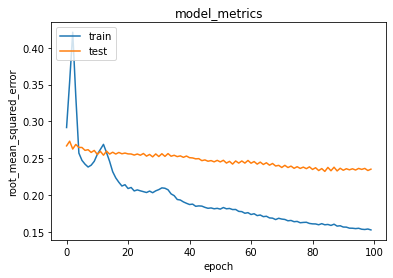

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
movie_df = pd.read_csv('movies.csv')

user_id = df.userId.sample(1).iloc[0]
movies_watched_by_user = df[df.userId == user_id]
movies_not_watched = movie_df[~movie_df['movieId'].isin(movies_watched_by_user.movieId.values)]['movieId']

movies_not_watched = list(set(movies_not_watched).intersection(set(movie2movie_encoded.keys())))

movies_not_watched = [[movie2movie_encoded.get(x)] for x in movies_not_watched]

user_encoder = user2user_encoded.get(user_id)

user_movie_array = np.hstack(
    ([[user_encoder]] * len(movies_not_watched), movies_not_watched)
)

ratings = model.predict(user_movie_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded2movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
]

In [ ]:
print(user_movie_array)

[[  22  407]
 [  22  211]
 [  22  295]
 ...
 [  22  201]
 [  22  801]
 [  22 1809]]


In [ ]:
print("Showing recommendations for user: {}".format(user_id))
print("====" * 9)
print("Movies with high ratings from user")
print("----" * 8)
top_movies_user = (
    movies_watched_by_user.sort_values(by="rating", ascending=False)
    .head(5)
    .movieId.values
)
movie_df_rows = movie_df[movie_df["movieId"].isin(top_movies_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ":", row.genres)

print("----" * 8)
print("Top 10 movie recommendations")
print("----" * 8)
recommended_movies = movie_df[movie_df["movieId"].isin(recommended_movie_ids)]
for row in recommended_movies.itertuples():
    print(row.title, ":", row.genres)


Showing recommendations for user: 23
Movies with high ratings from user
--------------------------------
Toy Story (1995) : Adventure|Animation|Children|Comedy|Fantasy
Space Jam (1996) : Adventure|Animation|Children|Comedy|Fantasy|Sci-Fi
Back to the Future (1985) : Adventure|Comedy|Sci-Fi
Pirates of the Caribbean: The Curse of the Black Pearl (2003) : Action|Adventure|Comedy|Fantasy
Star Trek Into Darkness (2013) : Action|Adventure|Sci-Fi|IMAX
--------------------------------
Top 10 movie recommendations
--------------------------------
Babe (1995) : Children|Drama
Clear and Present Danger (1994) : Action|Crime|Drama|Thriller
Gone with the Wind (1939) : Drama|Romance|War
2001: A Space Odyssey (1968) : Adventure|Drama|Sci-Fi
Dead Alive (Braindead) (1992) : Comedy|Fantasy|Horror
Fried Green Tomatoes (1991) : Comedy|Crime|Drama
Seven Samurai (Shichinin no samurai) (1954) : Action|Adventure|Drama
Sixth Sense, The (1999) : Drama|Horror|Mystery
Green Mile, The (1999) : Crime|Drama
Departed, 